In [1]:
import h5py
import numpy as np
import pandas as pd
import sklearn

In [2]:
file = "Autonomous_Vehicles_SVHN_single_grey1.h5"

In [3]:
df =h5py.File(file,'a')

In [4]:
keys= df.keys()
keys

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

g = []
for i in range(1):
    g.append(keys)
    
print(g[0])    

In [5]:
x_test = np.array(df.get("X_test"))
x_train = np.array(df.get("X_train"))
x_val = np.array(df.get("X_val"))
y_test = np.array(df.get("y_test"))
y_train = np.array(df.get ("y_train"))
y_val = np.array(df.get("y_val"))

In [6]:
x_train.shape, x_test.shape, x_val.shape

((42000, 32, 32), (18000, 32, 32), (60000, 32, 32))

In [7]:
y_train.shape, y_test.shape, y_val.shape

((42000,), (18000,), (60000,))

In [8]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

# Visualize the Data
plot a graph for training set for 10 entries of images and analyse them to have a rough idea on the data for preprocessing.

<ipython-input-9-bc52e31b3ba3>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (1, 1))


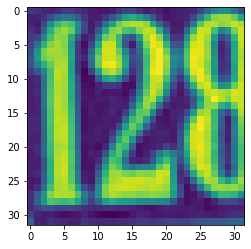

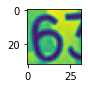

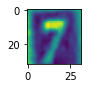

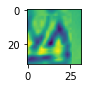

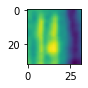

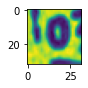

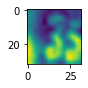

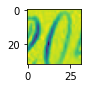

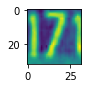

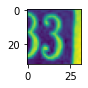

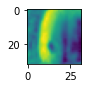

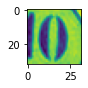

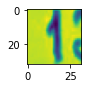

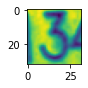

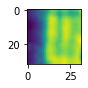

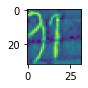

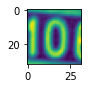

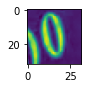

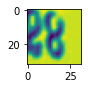

<Figure size 72x72 with 0 Axes>

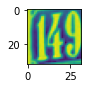

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(20):
    image = x_train[i]
    plt.figure(figsize = (1, 1))
    plt.figure(i)
    plt.imshow(image)

# Data Preprocessing.
The X data is reshaped from 3D array to a 2D array for Nueral Network models to process the data

In [10]:
#reshaping X data: (n, 32, 32) => (n, 1024)
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
x_val = x_val.reshape((x_val.shape[0], -1))

In [11]:
x_train.shape, x_test.shape, x_val.shape

((42000, 1024), (18000, 1024), (60000, 1024))

The X data or the Feature/Independent part of the data is scaled for better evaluation and processing of the Neural Network Model

In [12]:
from sklearn.preprocessing import StandardScaler as stdslr
XTRS = stdslr().fit_transform(x_train)
XTS = stdslr().fit_transform(x_test)
XVS = stdslr().fit_transform(x_val)
XTRS.shape, XTS.shape, XVS.shape

((42000, 1024), (18000, 1024), (60000, 1024))

In [13]:
from keras.utils.np_utils import to_categorical
YTRC = to_categorical(y_train)
YTC = to_categorical(y_test)
YVC = to_categorical(y_val)
YTRC.shape, YTC.shape, YVC.shape

((42000, 10), (18000, 10), (60000, 10))

In [14]:
import tensorflow
from tensorflow.keras import Sequential # For Forward Propagation
from tensorflow.keras.layers import Dense, LeakyReLU, Activation, Flatten
from tensorflow.keras import optimizers

# Basic Neural Model
Designing a basic NN_model to check the cross check the accuracy and performance and validate the classifier across the Data.

In [15]:
model = Sequential()

model.add(Dense(50, input_shape =(1024,), 
                activation= "sigmoid"))

model.add(Dense(50, 
                activation= "sigmoid"))
model.add(Dense(50, 
                activation= "sigmoid"))
model.add(Dense(50, 
                activation= "sigmoid"))
model.add(Dense(50, 
                activation= "sigmoid"))
model.add(Dense(10, 
                activation= "sigmoid"))
adam = optimizers.Adam(lr = 0.01)
model.compile(optimizer = adam, 
              loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                51250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 61,960
Trainable params: 61,960
Non-trainable params: 0
____________________________________________________

/Users/shadab_019/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [16]:
history = model.fit(XTRS, YTRC,validation_data= (x_val, YVC),
                    batch_size = 200, epochs = 50, verbose = 1)

Epoch 1/50
210/210 [==============================] - 2s 7ms/step - loss: 2.1943 - accuracy: 0.1354 - val_loss: 2.3222 - val_accuracy: 0.1271
Epoch 2/50
210/210 [==============================] - 1s 6ms/step - loss: 1.9691 - accuracy: 0.2245 - val_loss: 2.1859 - val_accuracy: 0.1729
Epoch 3/50
210/210 [==============================] - 1s 6ms/step - loss: 1.8479 - accuracy: 0.2838 - val_loss: 2.0333 - val_accuracy: 0.2295
Epoch 4/50
210/210 [==============================] - 1s 6ms/step - loss: 1.6706 - accuracy: 0.3920 - val_loss: 1.9384 - val_accuracy: 0.2954
Epoch 5/50
210/210 [==============================] - 1s 7ms/step - loss: 1.5153 - accuracy: 0.4708 - val_loss: 1.8866 - val_accuracy: 0.3429
Epoch 6/50
210/210 [==============================] - 1s 6ms/step - loss: 1.3912 - accuracy: 0.5315 - val_loss: 1.7561 - val_accuracy: 0.3784
Epoch 7/50
210/210 [==============================] - 1s 6ms/step - loss: 1.2855 - accuracy: 0.5755 - val_loss: 1.5674 - val_accuracy: 0.4889
Epoch 

In [17]:
results = model.evaluate(XTS, YTC)

563/563 [==============================] - 1s 2ms/step - loss: 0.8698 - accuracy: 0.7252


In [18]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7252222299575806


# Weight Initialization
We will Initialize weights to the neurons for better learning and performance. 

In [19]:
def nn_model1():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))     
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                           
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                           
    model.add(Activation('sigmoid'))
    model.add(Dense(10, kernel_initializer='he_normal'))                         
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])
    
    return model
nn_model1().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                51250     
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)               

In [20]:
NN1 = nn_model1()
history = NN1.fit(XTRS, YTRC,validation_data= (XVS, YVC),
                    batch_size = 200, epochs = 50, verbose = 1)

Epoch 1/50
210/210 [==============================] - 2s 7ms/step - loss: 2.3090 - accuracy: 0.1036 - val_loss: 2.2919 - val_accuracy: 0.1473
Epoch 2/50
210/210 [==============================] - 2s 8ms/step - loss: 2.1628 - accuracy: 0.1710 - val_loss: 1.9660 - val_accuracy: 0.2306
Epoch 3/50
210/210 [==============================] - 2s 8ms/step - loss: 1.8828 - accuracy: 0.2722 - val_loss: 1.8009 - val_accuracy: 0.3211
Epoch 4/50
210/210 [==============================] - 2s 8ms/step - loss: 1.7145 - accuracy: 0.3635 - val_loss: 1.6101 - val_accuracy: 0.4280
Epoch 5/50
210/210 [==============================] - 1s 7ms/step - loss: 1.5069 - accuracy: 0.4697 - val_loss: 1.4274 - val_accuracy: 0.4911
Epoch 6/50
210/210 [==============================] - 1s 7ms/step - loss: 1.3835 - accuracy: 0.5131 - val_loss: 1.3315 - val_accuracy: 0.5378
Epoch 7/50
210/210 [==============================] - 1s 7ms/step - loss: 1.3021 - accuracy: 0.5426 - val_loss: 1.2584 - val_accuracy: 0.5628
Epoch 

In [21]:
results = NN1.evaluate(XTS, YTC)

563/563 [==============================] - 2s 3ms/step - loss: 0.8208 - accuracy: 0.7431


In [22]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7431111335754395


# With "Relu"
Relu is more Linear "Activation Function" than sigmoid and tanh
which speeds ups the training process and improves the gradient Descent Calculation

In [23]:
def nn_model2():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))     
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                           
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                           
    model.add(Activation('relu'))
    model.add(Dense(10, kernel_initializer='he_normal'))                         
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])
    
    return model
nn_model2().summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 50)                51250     
_________________________________________________________________
activation_12 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_13 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_14 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 50)               

In [24]:
NN2 = nn_model2()
history = NN2.fit(XTRS, YTRC,validation_data= (XVS, YVC),
                    batch_size = 200, epochs = 50, verbose = 1)

Epoch 1/50
210/210 [==============================] - 2s 8ms/step - loss: 1.8053 - accuracy: 0.3693 - val_loss: 1.2542 - val_accuracy: 0.5933
Epoch 2/50
210/210 [==============================] - 1s 7ms/step - loss: 1.0975 - accuracy: 0.6506 - val_loss: 1.0025 - val_accuracy: 0.6800
Epoch 3/50
210/210 [==============================] - 2s 7ms/step - loss: 0.9550 - accuracy: 0.6979 - val_loss: 0.9087 - val_accuracy: 0.7127
Epoch 4/50
210/210 [==============================] - 1s 7ms/step - loss: 0.8685 - accuracy: 0.7284 - val_loss: 0.8267 - val_accuracy: 0.7425
Epoch 5/50
210/210 [==============================] - 1s 7ms/step - loss: 0.7979 - accuracy: 0.7521 - val_loss: 0.7602 - val_accuracy: 0.7665
Epoch 6/50
210/210 [==============================] - 1s 6ms/step - loss: 0.7669 - accuracy: 0.7608 - val_loss: 0.7737 - val_accuracy: 0.7596
Epoch 7/50
210/210 [==============================] - 2s 8ms/step - loss: 0.7209 - accuracy: 0.7773 - val_loss: 0.6986 - val_accuracy: 0.7853
Epoch 

In [25]:
results = NN2.evaluate(XTS, YTC)

563/563 [==============================] - 1s 2ms/step - loss: 0.8120 - accuracy: 0.7959


In [26]:
print('Test accuracy: ', results[1]*100)

Test accuracy:  79.59444522857666


In [27]:
from tensorflow.keras.layers import BatchNormalization, Dropout

# Dropout
Enhancing the NN_classifier by using Batch Normalisation function to standardize the inputs to layers which in return stablises the learning process making the model faster it also helps in reducing the number of "epochs" needed to process the NN_classifier Model.

In [28]:
def nn_model3():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model
nn_model3().summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 50)                51250     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
activation_24 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_25 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 50)               

In [29]:
NN3 = nn_model3()
history = NN3.fit(XTRS, YTRC,validation_data= (XVS, YVC),
                    batch_size = 200, epochs = 50, verbose = 1)

Epoch 1/50
210/210 [==============================] - 3s 10ms/step - loss: 1.6594 - accuracy: 0.4449 - val_loss: 1.2567 - val_accuracy: 0.6119
Epoch 2/50
210/210 [==============================] - 2s 8ms/step - loss: 1.0677 - accuracy: 0.6645 - val_loss: 0.9738 - val_accuracy: 0.6925
Epoch 3/50
210/210 [==============================] - 2s 8ms/step - loss: 0.9180 - accuracy: 0.7102 - val_loss: 0.8383 - val_accuracy: 0.7366
Epoch 4/50
210/210 [==============================] - 2s 8ms/step - loss: 0.8318 - accuracy: 0.7376 - val_loss: 0.7989 - val_accuracy: 0.7477
Epoch 5/50
210/210 [==============================] - 2s 8ms/step - loss: 0.7841 - accuracy: 0.7550 - val_loss: 0.7463 - val_accuracy: 0.7661
Epoch 6/50
210/210 [==============================] - 2s 10ms/step - loss: 0.7370 - accuracy: 0.7690 - val_loss: 0.7188 - val_accuracy: 0.7729
Epoch 7/50
210/210 [==============================] - 2s 10ms/step - loss: 0.6963 - accuracy: 0.7809 - val_loss: 0.6657 - val_accuracy: 0.7917
Epo

In [30]:
results = NN3.evaluate(XTS, YTC)

563/563 [==============================] - 2s 3ms/step - loss: 0.6347 - accuracy: 0.8201


In [31]:
print('Test accuracy: ', results[1]*100)

Test accuracy:  82.0111095905304


# Dropout
Using Dropout() by adding it to the layers of NN_Classifier Model we randomly subsample the layers which inturn prevents the model from being overfit

In [32]:
def nn_model4():
    model = Sequential()
    
    model.add(Dense(100, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model
nn_model4().summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 100)               102500    
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
activation_34 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_9 (Batch (None, 100)               400       
_________________________________________________________________
activation_35 (Activation)   (None, 100)              

In [33]:
NN4 = nn_model4()
history = NN4.fit(XTRS, YTRC,validation_data= (XVS, YVC),
                    batch_size = 200, epochs = 50, verbose = 1)

Epoch 1/50
210/210 [==============================] - 4s 13ms/step - loss: 2.3082 - accuracy: 0.1744 - val_loss: 1.8166 - val_accuracy: 0.3654
Epoch 2/50
210/210 [==============================] - 3s 13ms/step - loss: 1.7761 - accuracy: 0.3736 - val_loss: 1.3343 - val_accuracy: 0.5887
Epoch 3/50
210/210 [==============================] - 2s 12ms/step - loss: 1.4770 - accuracy: 0.5025 - val_loss: 1.0619 - val_accuracy: 0.6792
Epoch 4/50
210/210 [==============================] - 3s 12ms/step - loss: 1.3272 - accuracy: 0.5647 - val_loss: 0.9554 - val_accuracy: 0.7110
Epoch 5/50
210/210 [==============================] - 2s 11ms/step - loss: 1.2094 - accuracy: 0.6132 - val_loss: 0.8611 - val_accuracy: 0.7396
Epoch 6/50
210/210 [==============================] - 2s 11ms/step - loss: 1.1169 - accuracy: 0.6459 - val_loss: 0.7855 - val_accuracy: 0.7624
Epoch 7/50
210/210 [==============================] - 2s 11ms/step - loss: 1.0705 - accuracy: 0.6659 - val_loss: 0.7665 - val_accuracy: 0.7673

In [34]:
results = NN4.evaluate(XTS, YTC)

563/563 [==============================] - 2s 2ms/step - loss: 0.5246 - accuracy: 0.8391


In [35]:
print('Test accuracy: ', results[1]*100)

Test accuracy:  83.90555381774902


In [36]:
y_pred= NN4.predict(XTS)

In [37]:
y_pred[0]

array([0.5459174 , 0.06635247, 0.05776245, 0.01860632, 0.05577283,
       0.00788474, 0.02804547, 0.10856736, 0.02893698, 0.0821539 ],
      dtype=float32)

In [38]:
np.argmax(y_pred[1])

7

In [39]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
y_predict = []
for val in y_pred:
    y_predict.append(np.argmax(val))
metrics.confusion_matrix(y_test,y_predict)



array([[1616,   28,    7,   13,   28,    5,   29,   36,   14,   38],
       [  39, 1554,   18,   27,   77,    5,   11,   66,   18,   13],
       [  20,   30, 1528,   28,   40,    8,    5,   86,   23,   35],
       [  18,   28,   44, 1356,   33,   95,   22,   41,   47,   35],
       [  27,   39,   30,   11, 1599,   12,   24,   16,   15,   39],
       [  12,   14,   13,   85,   20, 1460,   81,   14,   35,   34],
       [  44,   20,   11,   16,   53,   59, 1533,   13,   68,   15],
       [  25,   55,   40,   19,   16,    9,   11, 1608,    8,   17],
       [  38,   45,   23,   44,   36,   33,  111,   19, 1395,   68],
       [  73,   28,   26,   47,   41,   41,   16,   32,   46, 1454]])

In [40]:
cr=metrics.classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1814
           1       0.84      0.85      0.85      1828
           2       0.88      0.85      0.86      1803
           3       0.82      0.79      0.81      1719
           4       0.82      0.88      0.85      1812
           5       0.85      0.83      0.84      1768
           6       0.83      0.84      0.83      1832
           7       0.83      0.89      0.86      1808
           8       0.84      0.77      0.80      1812
           9       0.83      0.81      0.82      1804

    accuracy                           0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000



In [41]:
hist_dict = history.history
print(hist_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [42]:
accuracy = hist_dict['accuracy']
val_accuracy = hist_dict['val_accuracy']
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

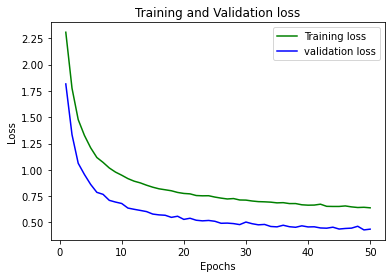

In [43]:
loss_train = loss
loss_val = val_loss
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

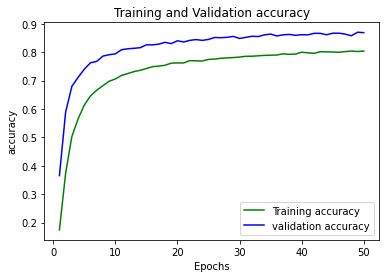

In [44]:
Acc_train = accuracy
Acc_val = val_accuracy
epochs = range(1,51)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Conclusion on Design, Tune, Train, Validate and Test
We can see from the confusion matrix the TP & TN are very high that means the model is performing well and from the two different plots for loss and accuracy we can se that the model constantly learning on the test data and performing better on validation data than the training the data by stabily and gradually reducing the loss and increasing the accuracy.

Dropout() and Batch Normalization has played a very important role while Designing and tuning this model by stablizing the learning process and preventing the model from becoming overfit while training.

# Pickle
Save/Pickle the model further usage by saving it in json format
And after pickling load and test the accuracy of the model to test and verify the process

In [45]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
NN_model_json = NN4.to_json()
with open("NN_model.json", "w") as json_file:
    json_file.write(NN_model_json)
# Pickle weights to HDF5
NN4.save_weights("NN_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('NN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("NN_model.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(XTS,YTC, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 83.91%
